In [1]:
import numpy as np
from scipy.fft import dct,idct
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from image_comression import *

# Separating into 8x8 blocks

In [2]:
image_array = cv2.resize(cv2.imread("D:\sem_7\Image_and_video_coding\Video_codec\\video-codec\Pattern.jpg",0), (640, 640))
blocks = get_blocks(image_array)

640 640
0 0


In [ ]:
plt.imshow(blocks[0],cmap="gray")
# print(image_array.shape)

In [ ]:
print(blocks[0])

# Discrete cosine transform for macro blocks

In [3]:
dct_blocks = get_dct_blocks(blocks)

In [ ]:
plt.imshow(dct_blocks[0])

# Quantize

In [4]:
high_quntized_blocks = quantize_blocks(dct_blocks,"high")
low_quntized_blocks = quantize_blocks(dct_blocks,"low")
mid_quntized_blocks = quantize_blocks(dct_blocks,"mid")

In [ ]:
uniques_low,counts_low = np.unique(high_quntized_blocks,return_counts = True)
print(len(uniques_low))

# Huffman coding (entropy coding)

In [5]:
huffman_codes_list_high = compress(high_quntized_blocks,"high.txt")
huffman_codes_list_low = compress(low_quntized_blocks,"low.txt")
huffman_codes_list_mid = compress(mid_quntized_blocks,"mid.txt")

# Decoding the blocks

In [6]:
result_blocks_high = decode_blocks('high.txt',huffman_codes_list_high)
result_blocks_low = decode_blocks('low.txt',huffman_codes_list_low)
result_blocks_mid = decode_blocks('mid.txt',huffman_codes_list_mid)

# Reconstructing the decoded blocks

In [7]:
reconstructed_high = reconstruct_from_blocks(result_blocks_high)
reconstructed_low = reconstruct_from_blocks(result_blocks_low)
reconstructed_mid = reconstruct_from_blocks(result_blocks_mid)

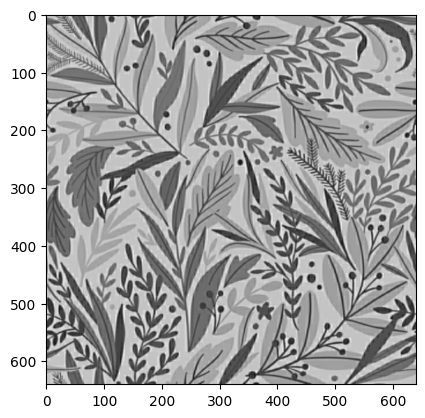

In [8]:
plt.imshow(reconstructed_high,cmap='gray')

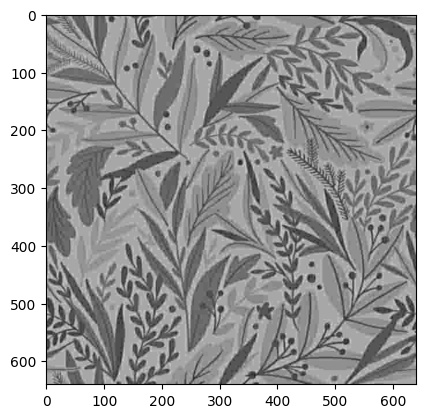

In [9]:
plt.imshow(reconstructed_low,cmap='gray')

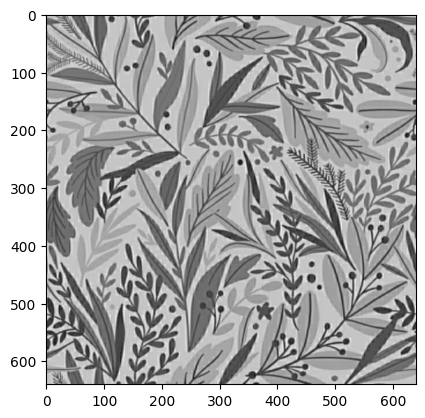

In [10]:
plt.imshow(reconstructed_mid,cmap='gray')

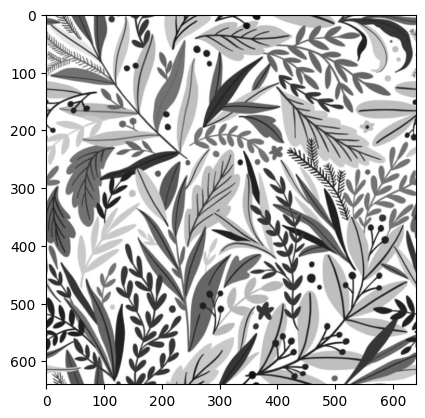

In [11]:
plt.imshow(image_array,cmap='gray')

# Calculating entropies

In [ ]:
print("Original - ",get_entropy(image_array))
print(get_entropy(reconstructed_high))
print(get_entropy(reconstructed_mid))
print(get_entropy(reconstructed_low))

# Calculating compression ratios

In [12]:
compression_ratio_high = 8/average_length(reconstructed_high,huffman_codes_list_high)
compression_ratio_mid = 8/average_length(reconstructed_mid,huffman_codes_list_mid)
compression_ratio_low = 8/average_length(reconstructed_mid,huffman_codes_list_mid)

print(compression_ratio_high)
print(compression_ratio_mid)
print(compression_ratio_low)

TypeError: list indices must be integers or slices, not str